In [3]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

df = pd.read_csv('../../../final_parsed_malt_data_cleaned.csv')
df

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,...,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date,city,Region_Name,timestamp
0,vince huguet,No profile image,Webdesigner,-,499,1.00,1h,['Webdesigner'],['Design'],0,...,Je vous dis bonjour.,0,0,0,vincehuguet,https://www.malt.fr/profile/vincehuguet,2013-02-26,Paris,île-de-france,2013-02-26
1,Stanislas Blaineau,https://dam.malt.com/fgvxeyh2zekvtqqrfbis?grav...,développeur php symphony 2/3/4 - full stack,8-15,400,0.91,4h,"['Développeur Web Back-end', 'Développeur Web ...","['symfony 2/3/4', 'MySQL', 'jQuery', 'Bootstra...",0,...,"Développeur web full-stack PHP depuis 2012, j'...",2,0,0,stanislasblaineau,https://www.malt.fr/profile/stanislasblaineau,2013-09-23,Lyon,auvergne-rhône-alpes,2013-09-23
2,Laura Ferron,https://dam.malt.com/rhqcv7lqrx2p8ujw2bok?grav...,Product designer Senior - UX / UI - Figma,8-15,400,1.00,1h,"['UI Designer', 'UX Designer']","[""design d'interface mobile"", 'Webdesign', 'Us...",1,...,Besoin d'une aide graphique pour un nouveau pr...,18,0,0,lauraferron,https://www.malt.fr/profile/lauraferron,2014-01-18,Paris,île-de-france,2014-01-18
3,Loïc B.,No profile image,DA Web / Chef de projets,-,300,1.00,1h,['Product Manager'],"['E-commerce', 'Wordpress', 'Prestashop', 'Ado...",0,...,Après plusieurs années en agence ( création de...,0,0,0,loicbel,https://www.malt.fr/profile/loicbel,2013-05-22,Toulouse,occitanie,2013-05-22
4,Philippe De Cuzey,https://dam.malt.com/vbjgjtuddc6dxgbk28qj?grav...,data engineer senior,8-15,750,0.50,2h,['Data Engineer'],"['Python', 'Spark', 'SQL', 'noSQL', 'Apache Ka...",0,...,"free lance data engineer, working on Big Data ...",1,0,0,philippedecuzey,https://www.malt.fr/profile/philippedecuzey,2014-01-16,Paris,île-de-france,2014-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178925,Caroline Aubry,https://dam.malt.com/8164ce22-8e98-4d6c-ab00-6...,Designer graphique - Websigner - Graphiste print,15et+,350,1.00,1h,"['Graphiste', 'UX Designer', 'Webdesigner']","['Adobe Photoshop', 'Adobe Illustrator', 'Desi...",0,...,"Designer graphique depuis plus de 15 ans, j'ex...",0,0,0,carolineaubry1,https://www.malt.fr/profile/carolineaubry1,2023-10-23,Lorient,bretagne,2023-10-23
178926,Catarina Marques,https://dam.malt.com/988d7dea-cf3c-4da0-b692-3...,Community manager,0-2,400,1.00,1h,['Community Manager'],"['Community management', 'Réseaux sociaux', 'C...",0,...,NaN,0,0,0,catarinamarques,https://www.malt.fr/profile/catarinamarques,2023-10-25,Houdan,île-de-france,2023-10-25
178927,Samy S.,https://dam.malt.com/24f73853-3e80-4972-a952-f...,Développeur Web,0-2,150,1.00,24h,"['Développeur CMS', 'Développeur Web Back-end'...","['HTML5', 'CSS3', 'Bubble.io', 'JavaScript', '...",0,...,"Développeur web full stack de formation, je ma...",0,0,0,samysebahi,https://www.malt.fr/profile/samysebahi,2023-10-15,Paris,île-de-france,2023-10-15
178928,Ophélie D.,https://dam.malt.com/520ca9da-4784-44c5-9833-7...,Conseil Marketplaces | Mirakl Amazon Cdiscount,3-7,300,1.00,4h,['Chef de projet digital'],"['E-commerce', 'Commerce de détail', 'Marketpl...",0,...,Le saviez-vous ?70% des ventes en ligne se fon...,0,0,0,opheliedelville,https://www.malt.fr/profile/opheliedelville,2023-11-01,Lille,hauts-de-france,2023-11-01


### CATEGORIES OF FREELANCERS

TOP 5 categories that get the best salary: is there a best category to be in (salary, length of mission?)

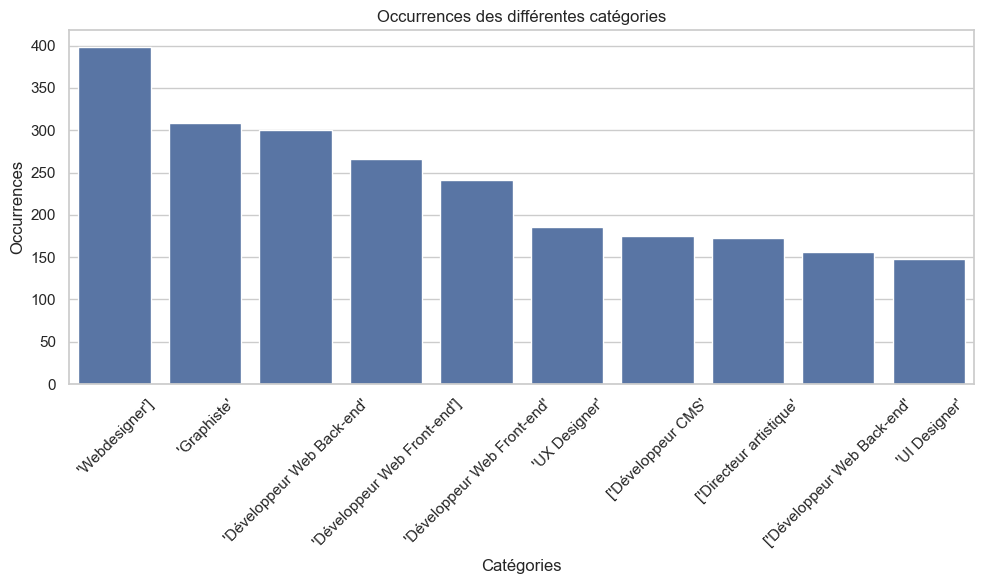

In [4]:
# Get the value counts of the different types of categories in the dataset and plot them
df = df[df['missions'] != 0]
df = df[df['categories'].apply(lambda x: isinstance(x, str) and x != '')]

# Diviser les valeurs de 'categories' en listes
df['categories'] = df['categories'].apply(lambda x: x.split(','))

# Appliquer explode pour obtenir une ligne par catégorie
df_exploded = df.explode('categories')

# Compter les occurrences des catégories
category_counts = df_exploded['categories'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Configuration de Seaborn pour afficher les graphiques dans le notebook
sns.set(style="whitegrid")
sns.set_context("notebook")

# limit to top 10 categories
category_counts = category_counts.head(10)

# Tracer un graphique à barres avec Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xlabel('Catégories')
plt.ylabel('Occurrences')
plt.title('Occurrences des différentes catégories')
plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

BEST 5 SKILLS to get in these top 5 categories

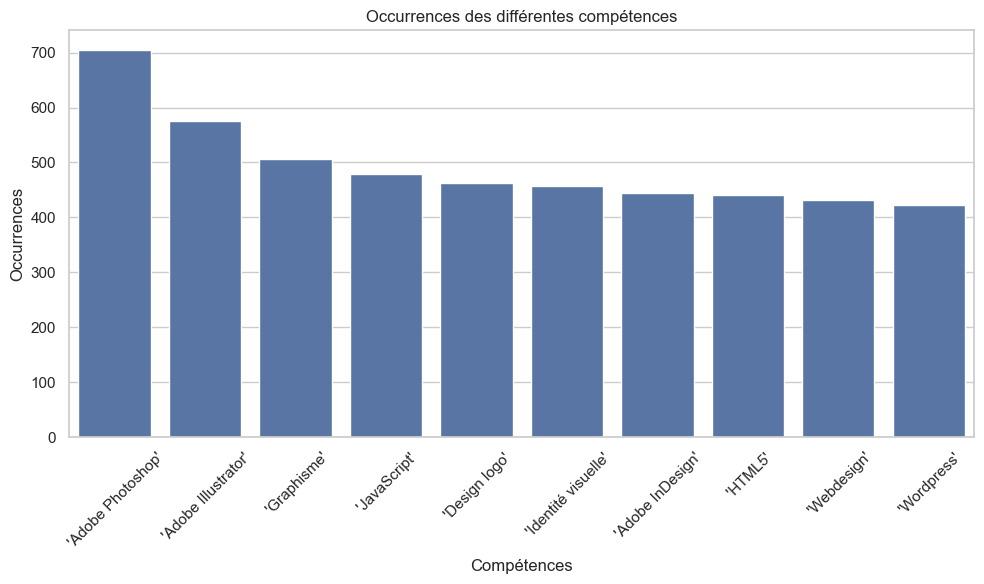

In [5]:
# plot top 5 best skills
df = df[df['skills'].apply(lambda x: isinstance(x, str) and x != '')]
df['skills'] = df['skills'].apply(lambda x: x.split(','))
df_exploded = df.explode('skills')

# count skill occurrences
skill_counts = df_exploded['skills'].value_counts().reset_index()
skill_counts.columns = ['Skill', 'Count']

# limit to top 5 skills
skill_counts = skill_counts.head(10)

# plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Skill', y='Count', data=skill_counts)
plt.xlabel('Compétences')
plt.ylabel('Occurrences')
plt.title('Occurrences des différentes compétences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
data_scientists_data = df["categories"]
data_scientists_data.head()
# avg_salary = data_scientists_data['price'].mean()

# plt.figure(figsize=(10, 6))
# data_scientists_data.plot(kind='bar', color='coral')
# plt.title('Recommandations per profile (head 5)')
# plt.xlabel('profil')
# plt.ylabel('Recommandations')
# plt.xticks(rotation=45)
# plt.show()


# plt.figure(figsize=(8, 6))
# sns.histplot(data_scientists_data['remuneration'], bins=20, kde=True)
# plt.title('Distribution de la rémunération des data_scientists')
# plt.xlabel('Rémunération')
# plt.ylabel('Nombre de data_scientists')
# plt.show()

# # sns.set_theme(style="darkgrid")

# # tips = sns.load_dataset(df)
# # g = sns.jointplot(x="total_bill", y="tip", data=tips,
# #                   kind="reg", truncate=False,
# #                   xlim=(0, 60), ylim=(0, 12),
# #                   color="m", height=7)

23989    [['Monteur vidéo',  'Motion Designer',  'Direc...
23990                                [['Développeur CMS']]
23992    [['Graphiste',  'UI Designer',  'UX Designer',...
24019                  [['Consultant RH et organisation']]
24029    [['Développeur systèmes embarqués',  'Ingénieu...
Name: categories, dtype: object

IndexError: index 0 is out of bounds for axis 0 with size 0

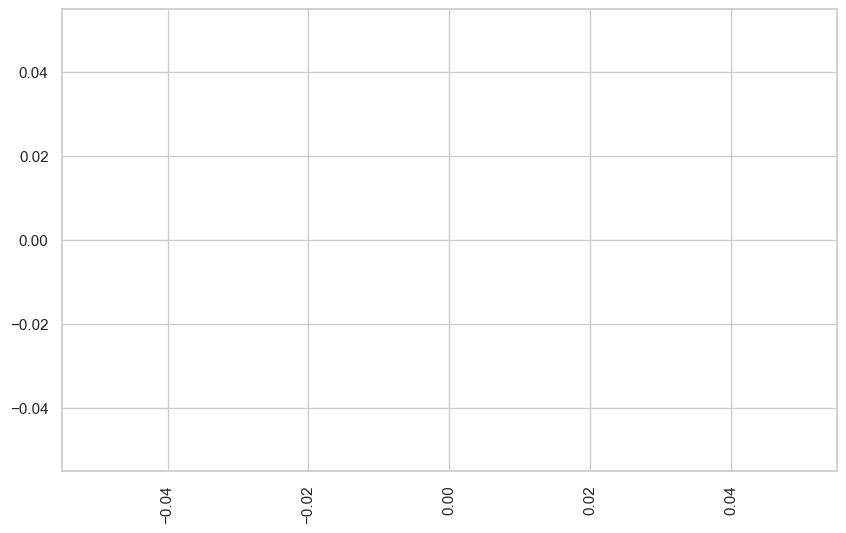

In [17]:
graphist_data = df[df["headline"] == 'Graphiste']
graphist_data.head()

graphist_data_price = df[(df["headline"] == 'Graphiste') & (df["price"] == 'Graphiste')]  
graphist_data_price.head()

plt.figure(figsize=(10, 6))
graphist_data_price['price'].value_counts().plot(kind='bar', color='coral') 
plt.title('Graphiste Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()